# Debugging computational graphs using `torchviz`

In [1]:
!pip install torchviz

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from afem.models import VectorSpinModel
from torchviz import make_dot


def resize_graph(dot, size_per_element=0.5, min_size=12):
    """Resize the graph according to how much content it contains."""
    # Get the approximate number of nodes and edges
    num_rows = len(dot.body)
    content_size = num_rows * size_per_element
    size = max(min_size, content_size)
    size_str = str(size) + "," + str(size)
    dot.graph_attr.update(size=size_str)
    return dot

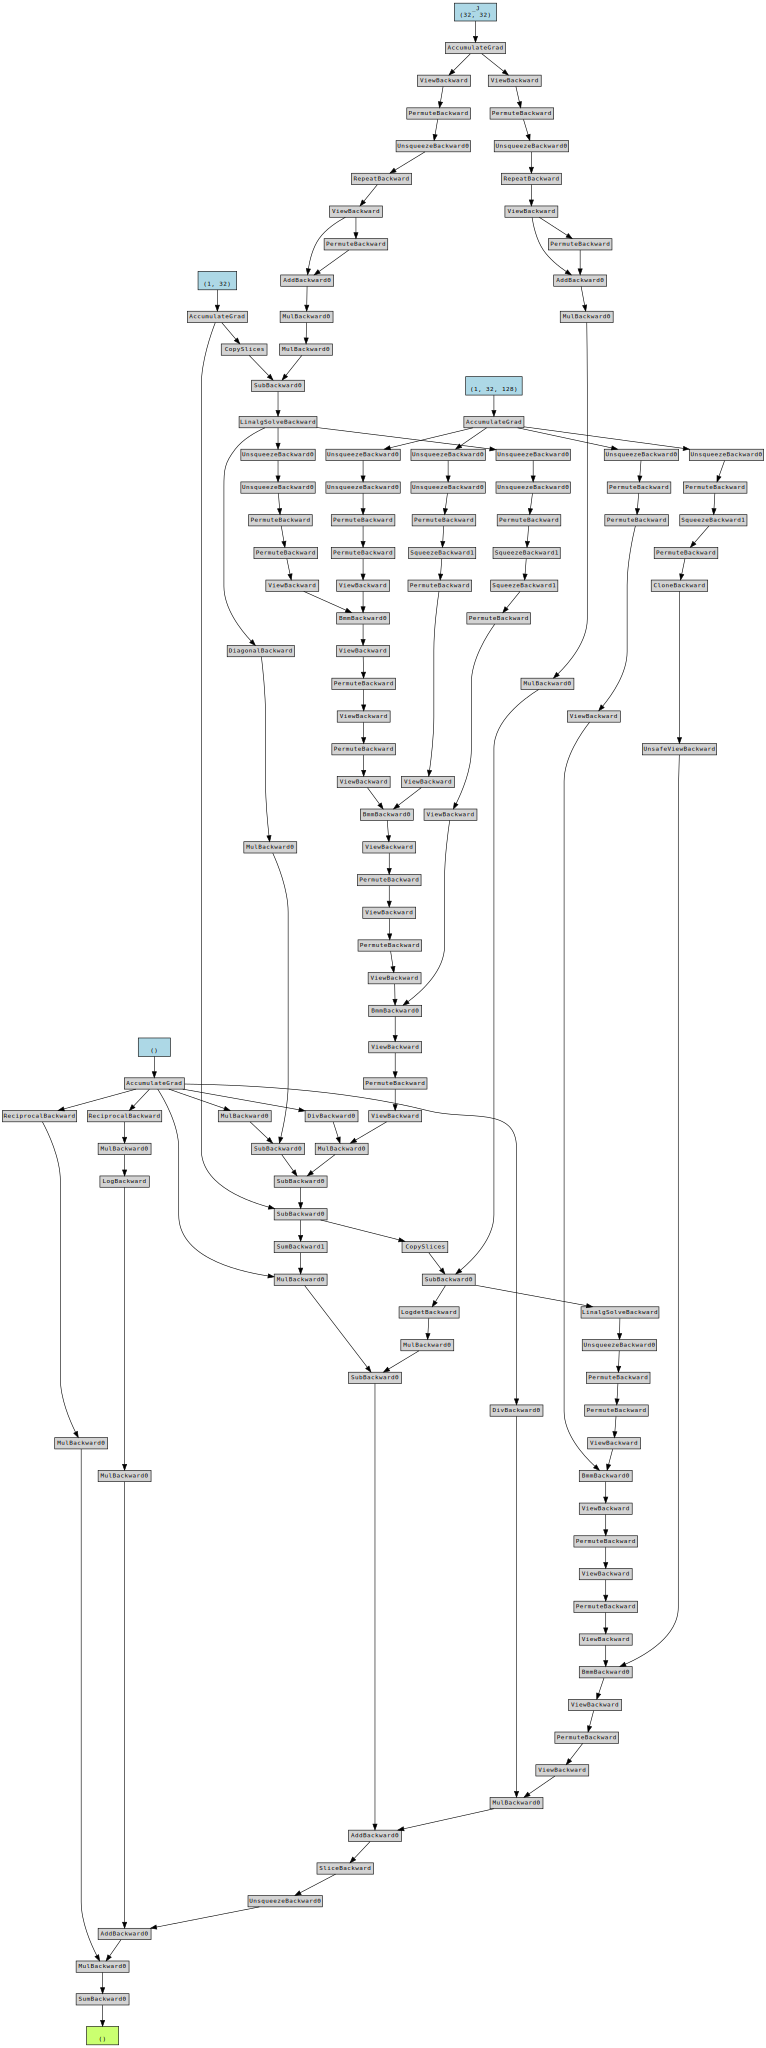

In [3]:
num_spins, dim = 32, 128

model = VectorSpinModel(
    num_spins=num_spins,
    dim=dim,
    beta=1.0,
)

x = torch.randn(1, num_spins, dim).requires_grad_()
t0 = torch.ones(num_spins).requires_grad_()

afe, t_star, responses = model(x, t0=t0, return_magnetizations=True)

resize_graph(make_dot(afe.sum(), params=dict(model.named_parameters())))  # .render('torchviz_output/model_responses')

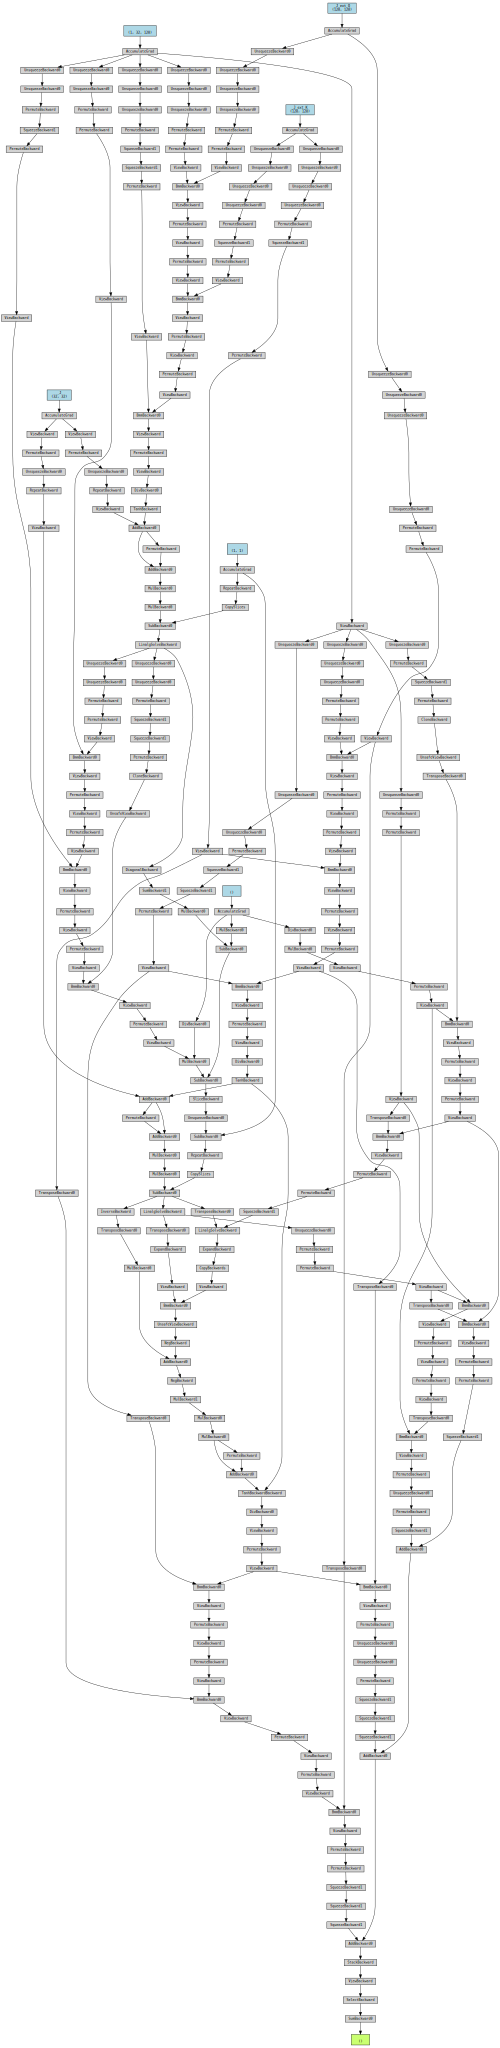

In [4]:
num_spins, dim = 32, 128

model = VectorSpinModel(
    num_spins=num_spins,
    dim=dim,
    beta=1.0,
    J_add_external=True,
)

x = torch.randn(1, num_spins, dim).requires_grad_()
t0 = torch.ones(1).requires_grad_()

afe, t_star, responses = model(x, t0=t0, return_magnetizations=True)

resize_graph(make_dot(responses.sum(), params=dict(model.named_parameters())))  # .render('torchviz_output/model_responses')